# Read list_meop.pkl and draw global maps

In [1]:
from os import walk
from os.path import isfile, join
import glob
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import cartopy.crs as ccrs
from itertools import islice

/opt/tljh/user/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


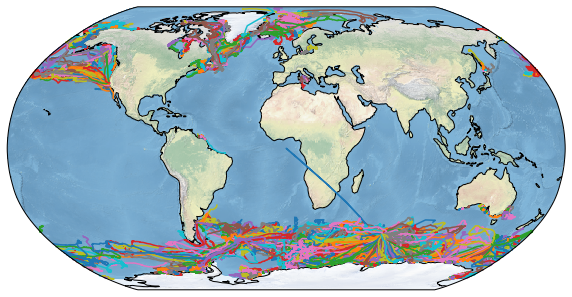

In [32]:
df = pd.read_pickle('list_meop.pkl')
df = df.loc[df['N_TEMP']!=0]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

grouped = df.groupby('SMRU_PLATFORM_CODE')
for name,group in islice(grouped,len(grouped)):
    lon = np.where(np.abs(group['LONGITUDE'].diff())>100,np.nan,group['LONGITUDE'])
    lat = group['LATITUDE']
    ax.plot(lon,lat,transform=ccrs.PlateCarree())

plt.show()


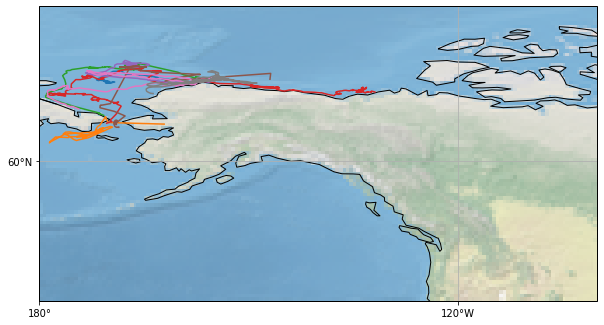

In [39]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

grouped = df.groupby('SMRU_PLATFORM_CODE')
for name,group in islice(grouped,10):
    lon = np.where(np.abs(group['LONGITUDE'].diff())>100,np.nan,group['LONGITUDE'])
    lat = group['LATITUDE']
    ax.plot(lon,lat,transform=ccrs.PlateCarree())

ax.set_extent([-180, -100, 40, 80])
ax.stock_img()
ax.coastlines()
ax.gridlines(xlocs=ax.get_xticks(),ylocs=ax.get_yticks())
plt.show()
